In [1]:
from astropy.convolution import convolve,convolve_fft


In [2]:
from astropy.convolution import Gaussian1DKernel
gauss=Gaussian1DKernel(stddev=2)

In [3]:
gauss.array

array([  6.69151129e-05,   4.36341348e-04,   2.21592421e-03,
         8.76415025e-03,   2.69954833e-02,   6.47587978e-02,
         1.20985362e-01,   1.76032663e-01,   1.99471140e-01,
         1.76032663e-01,   1.20985362e-01,   6.47587978e-02,
         2.69954833e-02,   8.76415025e-03,   2.21592421e-03,
         4.36341348e-04,   6.69151129e-05])

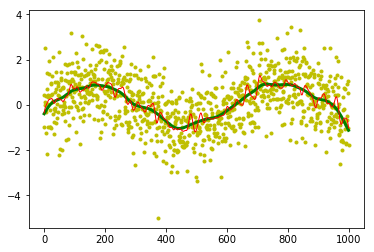

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(1000).astype(float)
y=np.sin(x/100.)+np.random.normal(0,1,x.shape)

g=Gaussian1DKernel(stddev=20)
g1=Gaussian1DKernel(stddev=5)
z=convolve(y,g,boundary='extend')
z1=convolve(y,g1,boundary='extend')
plt.plot(x,y,'y.')
plt.plot(x,z,'g-',lw=3)
plt.plot(x,z1,'r-',lw=1)
plt.show()

In [14]:
x.shape

(1000,)

In [15]:
x.size

1000

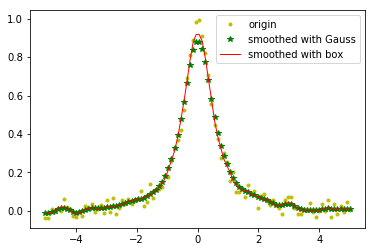

In [26]:
import numpy as np
from astropy.modeling.models import Lorentz1D
from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel 
lorentz = Lorentz1D(1, 0, 1)
x = np.linspace(-5, 5, 100)
data_1D = lorentz(x) + 0.1 * (np.random.rand(100) - 0.5)

gauss_kernel=Gaussian1DKernel(2)
gauss_smoothed_data_box=convolve(data_1D,gauss_kernel)

box_kernel=Box1DKernel(5)
smoothed_data_box=convolve(data_1D,box_kernel)

plt.plot(x,data_1D,'y.',label='origin')
plt.plot(x,gauss_smoothed_data_box,'g*',lw=3,label='smoothed with Gauss')
plt.plot(x,smoothed_data_box,'r-',lw=1,label='smoothed with box')
plt.legend()
plt.show()

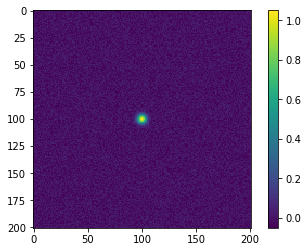

In [32]:
import numpy as np
from astropy.convolution import convolve, Gaussian2DKernel, Tophat2DKernel 
from astropy.modeling.models import Gaussian2D
gauss = Gaussian2D(1, 0, 0, 3, 3)
# Fake image data including noise
x = np.arange(-100, 101)
y = np.arange(-100, 101)
x, y = np.meshgrid(x, y)
data_2D = gauss(x, y) + 0.1 * (np.random.rand(201, 201) - 0.5)

gauss_kernel2=Gaussian2DKernel(2)
gauss_smoothed_data_box2=convolve(data_2D,gauss_kernel2)

tophat_kernel2=Tophat2DKernel(5)
smoothed_data_tophat=convolve(data_2D,tophat_kernel2)

plt.imshow(data_2D)
plt.colorbar()
plt.show()